> GNAR

In [1]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [2]:
%load_ext rpy2.ipython

In [24]:
%%R
library(GNAR)
library(igraph)

## Ex 1

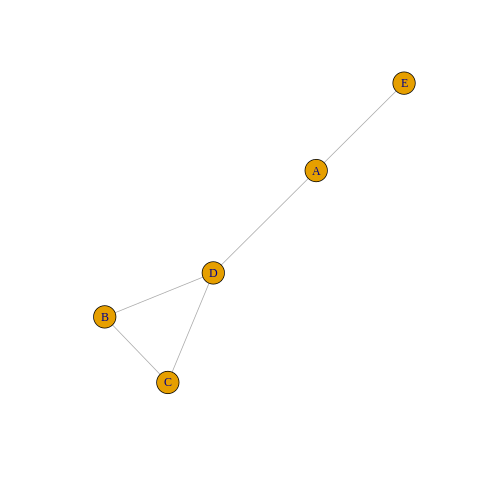

In [25]:
%%R
plot(fiveNet, vertex.label = c("A", "B", "C", "D", "E"))

In [15]:
%%R
summary("fiveNet")

   Length     Class      Mode 
        1 character character 


In [18]:
%%R
fiveNet2 <- GNARtoigraph(net = fiveNet)
summary(fiveNet2)

IGRAPH eee756c U-W- 5 5 -- 
+ attr: weight (e/n)


In [19]:
%%R
fiveNet3 <- igraphtoGNAR(fiveNet2)
all.equal(fiveNet, fiveNet3)

[1] TRUE


whereas the reverse conversion would be performed as

In [20]:
%%R
g <- make_ring(10)
print(igraphtoGNAR(g))

GNARnet with 10 nodes 
edges:1--2 1--10 2--1 2--3 3--2 3--4 4--3 4--5 5--4 5--6 
     6--5 6--7 7--6 7--8 8--7 8--9 9--8 9--10 10--1 10--9 
     
 edges of each of length  1 


we can prosucean adjacency matrix for the `fiveNet` obeject with

In [22]:
%%R
as.matrix(fiveNet)

     [,1] [,2] [,3] [,4] [,5]
[1,]    0    0    0    1    1
[2,]    0    0    1    1    0
[3,]    0    1    0    1    0
[4,]    1    1    1    0    0
[5,]    1    0    0    0    0


and an example converting a weighted adjacency matrix to a GNARnet object is

In [23]:
%%R
adj <- matrix(runif(9), ncol = 3, nrow = 3)
adj[adj < 0.3] <- 0
print(matrixtoGNAR(adj))

GNARnet with 3 nodes 
edges:1--3 2--1 2--3 3--1 
 edges of unequal lengths 


## Ex 2.

In [26]:
%%R
data("fiveNode")
answer <- GNARfit(vts = fiveVTS, net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1))
answer

Model: 
GNAR(2,[1,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1   dmatalpha2  dmatbeta2.1  
    0.20624      0.50277      0.02124     -0.09523  



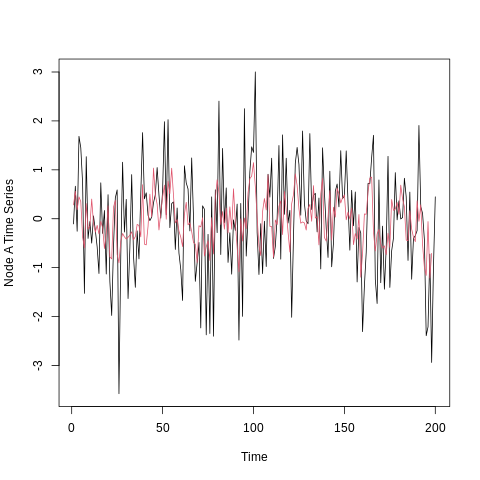

In [28]:
%%R
plot(fiveVTS[, 1], ylab = "Node A Time Series")
lines(fitted(answer)[, 1], col = 2)

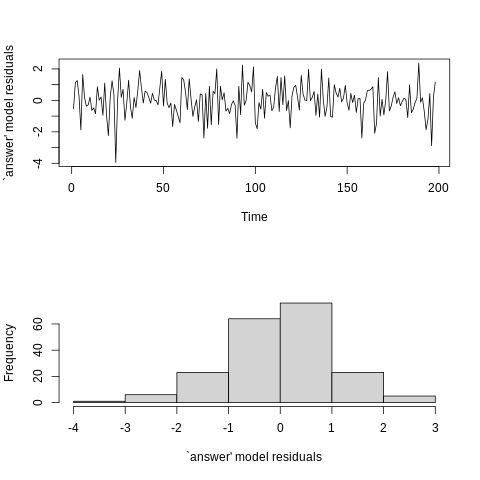

In [29]:
%%R
myresiduals <- residuals(answer)[, 1]
layout(matrix(c(1, 2), 2, 1))
plot(ts(residuals(answer)[, 1]), ylab = "`answer' model residuals")
hist(residuals(answer)[, 1], main = "", xlab = "`answer' model residuals")

## Ex 3.

- Ex 1. 이어서

In [30]:
%%R
set.seed(10)
fiveVTS2 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(c(0.4, 0, -0.6, 0, 0)), betaParams = list(c(0.3)))

In [31]:
%%R
print(GNARfit(vts = fiveVTS2, net = fiveNet, alphaOrder = 1, betaOrder = 1, globalalpha = FALSE))

Model: 
GNAR(1,[1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
dmatalpha1node1  dmatalpha1node2  dmatalpha1node3  dmatalpha1node4  
        0.45902          0.13133         -0.49166          0.03828  
dmatalpha1node5      dmatbeta1.1  
        0.02249          0.24848  



In [43]:
%%R
set.seed(10)
fiveVTS3 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(rep(0.2, 5), rep(0.3, 5)), betaParams = list(c(0.2, 0.3), c(0)))
print(GNARfit(vts = fiveVTS3, net = fiveNet, alphaOrder = 2, betaOrder = c(2,0)))

Model: 
GNAR(2,[2,0]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2   dmatalpha2  
     0.2537       0.1049       0.3146       0.2907  



## Missing data and changing connection weights with GNAR models

- as changing connection weights
- overall network os considered fixed

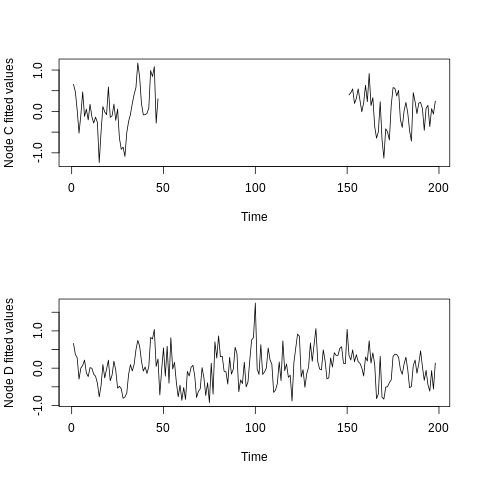

In [44]:
%%R
fiveVTS0 <- fiveVTS
fiveVTS0[50:150, 3] <- NA
nafit <- GNARfit(vts = fiveVTS0, net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1))
layout(matrix(c(1, 2), 2, 1))
plot(ts(fitted(nafit)[, 3]), ylab = "Node C fitted values")
plot(ts(fitted(nafit)[, 4]), ylab = "Node D fitted values")

## Stationary conditions for a GNAR process with fixed network

In [45]:
%%R
set.seed(10)
fiveVTS4 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(rep(0.2, 5)), betaParams = list(c(0.85)))
c(mean(fiveVTS4[1:50, ]), mean(fiveVTS4[51:100, ]), mean(fiveVTS4[101:150, ]), mean(fiveVTS4[151:200, ]))

[1]    -120.511   -1370.216  -15725.884 -180319.140


In [46]:
%%R
BIC(GNARfit())

[1] -0.003953124


## Model selection on a wind network time series

the data suite vswind that contains a number of R objects pertaining to 721 wind speeds taken at each of 102 weather stations in England and Wales. The suite contains the vector time series vswindts, the associated network vswindnet, a character vector of the weather station location names in vswindnames and coordinates of the stations in the two column matrix vswindcoords. The data originate from the UK Met Office site http://wow.metoffice.gov.uk and full details can be found in the vswind help file in the GNAR package. 

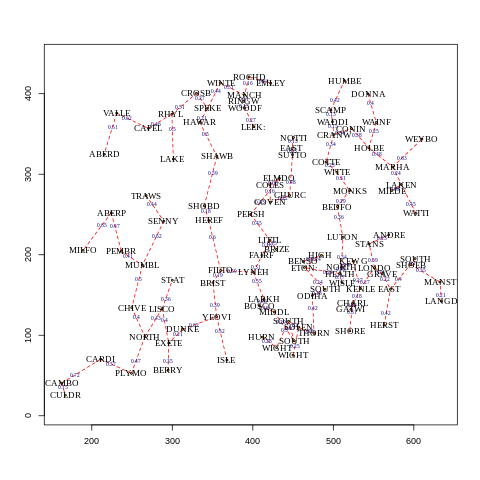

In [47]:
%%R
oldpar <- par(cex = 0.75)
windnetplot()
par(oldpar)

In [48]:
%%R
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1, betaOrder = 0))

[1] -233.3848


In [49]:
%%R
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1, betaOrder = 0, globalalpha = FALSE))

[1] -233.1697


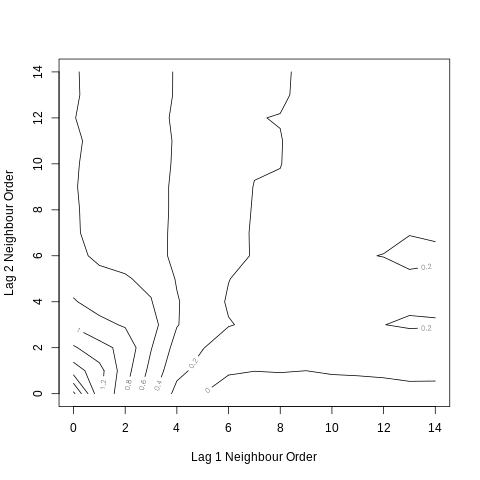

In [55]:
%%R
BIC.Alpha2.Beta <- matrix(0, ncol = 15, nrow = 15)
for(b1 in 0:14)
    for(b2 in 0:14)
        BIC.Alpha2.Beta[b1 + 1, b2 + 1] <- BIC(GNARfit(vts = vswindts,
                    net = vswindnet, alphaOrder = 2, betaOrder = c(b1, b2)))
contour(0:14, 0:14, log(251 + BIC.Alpha2.Beta), xlab = "Lag 1 Neighbour Order", ylab = "Lag 2 Neighbour Order")

In [56]:
%%R
goodmod <- GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 2, betaOrder = c(5, 1))
goodmod

Model: 
GNAR(2,[5,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2  dmatbeta1.3  dmatbeta1.4  dmatbeta1.5  
    0.56911      0.10932      0.03680      0.02332      0.02937      0.04709  
 dmatalpha2  dmatbeta2.1  
    0.23424     -0.04872  



## Constructing a network to aid prediction

In [57]:
%%R
prediction <- predict(GNARfit(vts = fiveVTS[1:199,], net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1)))
prediction

Time Series:
Start = 1 
End = 1 
Frequency = 1 
    Series 1  Series 2  Series 3  Series 4   Series 5
1 -0.6427718 0.2060671 0.2525534 0.1228404 -0.8231921


## OECD GDP: Network structure aids prediction

R[write to console]: Loading required package: spam

R[write to console]: Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

R[write to console]: 
Attaching package: ‘spam’


R[write to console]: The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


R[write to console]: Loading required package: viridis

R[write to console]: Loading required package: viridisLite

R[write to console]: 
Try help(fields) to get started.



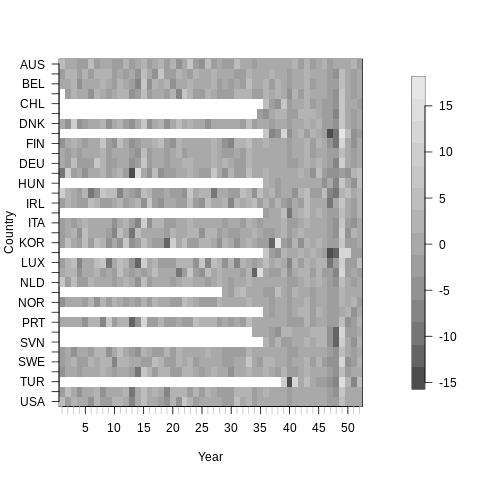

In [58]:
%%R
library("fields")
layout(matrix(c(1, 2), nrow = 1, ncol = 2), widths = c(4.5, 1))
image(t(apply(gdpVTS, 1, rev)), xaxt = "n", yaxt = "n", col = gray.colors(14), xlab = "Year", ylab = "Country")
axis(side = 1, at = seq(from = 0, to = 1, length = 52), labels = FALSE, col.ticks = "grey")
axis(side = 1, at = seq(from = 0, to = 1, length = 52)[5*(1:11)], labels = (1:52)[5*(1:11)])
axis(side = 2, at = seq(from = 1, to = 0, length = 35), labels = colnames(gdpVTS), las = 1, cex = 0.8)
layout(matrix(1))
image.plot(zlim = range(gdpVTS, na.rm = TRUE), legend.only = TRUE, col = gray.colors(14))

## Finding a network to aid prediction

In [59]:
%%R
net1 <- seedToNet(seed.no = seed.nos[1], nnodes = 35, graph.prob = 0.15)
net2 <- seedToNet(seed.no = seed.nos[2], nnodes = 35, graph.prob = 0.15)

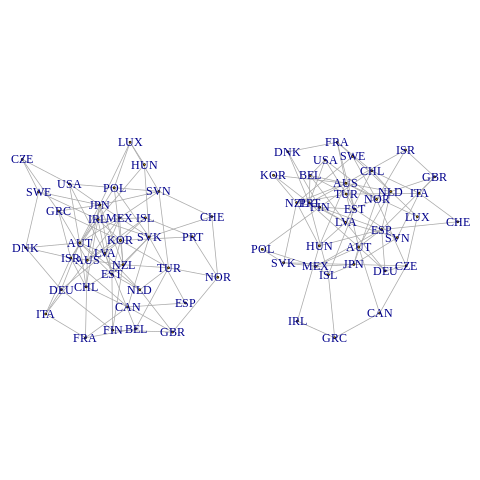

In [60]:
%%R
layout(matrix(c(2, 1), 1, 2))
par(mar=c(0,1,0,1))
plot(net1, vertex.label = colnames(gdpVTS), vertex.size = 0)
plot(net2, vertex.label = colnames(gdpVTS), vertex.size = 0)

In [61]:
%%R
gdpVTSn <- apply(gdpVTS, 2, function(x){x / sd(x[1:50], na.rm = TRUE)})
alphas <- c(rep(1, 2), rep(2, 6))
betas <- list(c(0), c(1), c(0, 0), c(1, 0), c(1, 1), c(2, 0), c(2, 1), c(2, 2))
seedSim <- function(seedNo, modelNo, globalalpha){
    net1 <- seedToNet(seed.no = seedNo, nnodes = 35, graph.prob = 0.15)
    gdpPred <- predict(GNARfit(vts = gdpVTSn[1:50, ], net = net1,
                               alphaOrder = alphas[modelNo], betaOrder = betas[[modelNo]],
                               globalalpha = globalalpha))
    return(sum((gdpPred - gdpVTSn[51, ])^2))
    }

In [62]:
%%R
seedSim(seedNo = seed.nos[1], modelNo = 1, globalalpha = TRUE)

[1] 23.36913


In [63]:
%%R
seedSim(seed.nos[1], modelNo = 3, globalalpha = TRUE)

[1] 11.50739


In [64]:
%%R
seedSim(seed.nos[1], modelNo = 3, globalalpha = FALSE)

[1] 18.96766


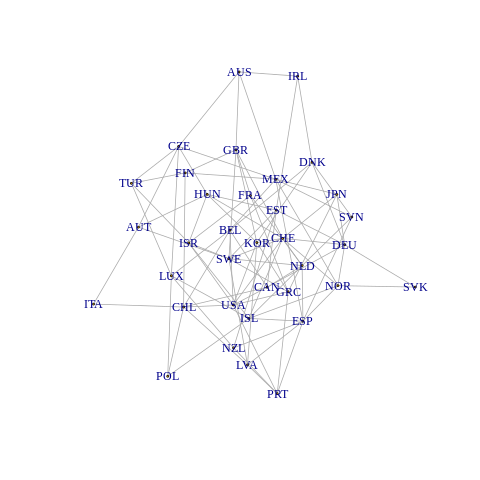

In [65]:
%%R
net921 <- seedToNet(seed.no = seed.nos[921], nnodes = 35, graph.prob = 0.15)
layout(matrix(c(1), 1, 1))
plot(net921, vertex.label = colnames(gdpVTS), vertex.size = 0)

In [69]:
%%R
res <- rep(NA, 8)
for(i in 1:8){
    res[i] <- BIC(GNARfit(gdpVTSn[1:50, ],
                          net = seedToNet(seed.nos[921], nnodes = 35, graph.prob = 0.15),
                          alphaOrder = alphas[i], betaOrder = betas[[i]]))}
order(res)

[1] 6 3 4 7 8 5 1 2


In [70]:
%%R
sort(res)

[1] -64.44811 -64.32155 -64.18751 -64.12683 -64.09656 -63.86919 -60.67858
[8] -60.54207


## Results and comparisons

In [71]:
%%R
gdpVTSn2 <- apply(gdpVTS, 2, function(x){x / sd(x[1:51], na.rm = TRUE)})
gdpFit <- GNARfit(gdpVTSn2[1:51,], net = net921, alphaOrder = 2, betaOrder = c(2, 0))
summary(gdpFit)


Call:
lm(formula = yvec2 ~ dmat2 + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4806 -0.5491 -0.0121  0.5013  3.1208 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
dmat2alpha1  -0.41693    0.03154 -13.221  < 2e-16 ***
dmat2beta1.1 -0.12662    0.05464  -2.317   0.0206 *  
dmat2beta1.2  0.28044    0.06233   4.500  7.4e-06 ***
dmat2alpha2  -0.33282    0.02548 -13.064  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8926 on 1332 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.1859,	Adjusted R-squared:  0.1834 
F-statistic: 76.02 on 4 and 1332 DF,  p-value: < 2.2e-16

GNAR BIC: -62.86003

In [72]:
%%R
sum((predict(gdpFit) - gdpVTSn2[52, ])^2)

[1] 5.737203


In [76]:
%%R
library("forecast")
arforecast <- apply(gdpVTSn2[1:51, ], 2, function(x){
            forecast(auto.arima(x[!is.na(x)], d= ,D=0,max.p = 2,max.q=0,
                                max.P=0,max.Q = 0,stationary = TRUE, seasonal = FALSE), ic = "bic",
                     allowmean = FALSE, allowdraft = FALSE, trace = FALSE, h=1)$mean
})
sum((arforecast - gdpVTSn2[52, ])^2)

[1] 7.8974


In [78]:
%%R
library("vars")
gdpVTSn2.0 <- gdpVTSn2
gdpVTSn2.0[is.na(gdpVTSn2.0)] <- 0
varforecast <- predict(restrict(VAR(gdpVTSn2.0[1:51, ], p = 1, type = "none")), n.ahead = 1)

In [79]:
%%R
getfcst <- function(x){return(x[1])}
varforecastpt <- unlist(lapply(varforecast$fcst, getfcst))
sum((varforecastpt - gdpVTSn2.0[52, ])^2)

[1] 26.19805


In [1067]:
%R -o x_1
%R -o index_of_trueoutlier_1
%R -o signal_1